In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import math
from pandas.api.types import CategoricalDtype

In [55]:
def plot_histogram(data,n):
    %matplotlib inline     
    # allows to output plots in the notebook
    plt.style.use("ggplot")     # Set the default style
    plt.rcParams['figure.dpi'] = 250
    if (data.dtype !=  object) or (data.dtype !=  category):
        plt.hist(data,  width = 0.5, 
                 weights = np.ones(len(data)) / len(data),
                 bins=(np.arange(n+1)-0.2)+min(data) )
    else:
        plt.hist(data,  width = 0.5, 
                 weights = np.ones(len(data)) / len(data),
                 bins=(np.arange(n+1)-0.2) )    
    
    plt.xticks(rotation=90,fontsize=8)
    plt.show()

In [56]:
cleaned_data = pd.read_excel(r'cleaned_data.xlsx')
cleaned_data.isnull().sum()
combine = [cleaned_data]

In [57]:
for dataset in combine:
    
    dataset['date'] = cleaned_data['contract_start']
    dataset['year'] = dataset.date.dt.year
    dataset['month'] = dataset.date.dt.month
    dataset['day'] = dataset.date.dt.day
    dataset['dayofyear'] = dataset.date.dt.dayofyear
    dataset['dayofweek'] = dataset.date.dt.dayofweek
    dataset['weekofyear'] = dataset.date.dt.weekofyear
    dataset['weekofmonth'] = dataset['weekofyear']
    dataset['weekofmonth'] = (dataset.date.dt.day/7) +1
    dataset['weekofmonth'] = dataset['weekofmonth'].apply(np.floor)
    display(dataset)
    # Additional date features
    dataset['log_dayofyear'] = np.log(dataset['dayofyear'])
    dataset['day_power_year'] = np.log((np.log(dataset['dayofyear'] + 1)) ** (dataset['year'] - 2000))
    dataset['day_week_power_year'] = np.log(np.log(dataset['dayofyear'] + 1) * (np.log(dataset['weekofyear'] + 1)) ** (dataset['year'] - 2000))
    # Drop date
    dataset.drop(['date'], axis=1, inplace=True)

,Unnamed: 0,id,contract_start,age,gender,maritalstatus,education,dependants,job,town,default,date,year,month,day,dayofyear,dayofweek,weekofyear,weekofmonth
0,0,1,2018-01-04,43,MALE,MARRIED,SECONDARY_SPECIALISED,3,EMPLOYEE,Reykjavík,0,2018-01-04,2018,1,4,4,3,1,1.0
1,1,2,2018-01-24,50,FEMALE,MARRIED,SECONDARY,3,ENTREPRENEUR,Reykjavík,1,2018-01-24,2018,1,24,24,2,4,4.0
2,2,3,2018-01-02,29,MALE,COHABITING,SECONDARY_SPECIALISED,0,EMPLOYEE,Vestmannaeyjar,0,2018-01-02,2018,1,2,2,1,1,1.0
3,3,4,2018-01-02,29,MALE,COHABITING,SECONDARY_SPECIALISED,0,EMPLOYEE,Álftanes,0,2018-01-02,2018,1,2,2,1,1,1.0
4,4,5,2018-01-02,28,MALE,COHABITING,SECONDARY_SPECIALISED,1,EMPLOYEE,Reykjavík,1,2018-01-02,2018,1,2,2,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7985,7992,7993,2019-01-31,71,MALE,MARRIED,SECONDARY_SPECIALISED,0,RETIRED,Reykjavík,0,2019-01-31,2019,1,31,31,3,5,5.0
7986,7993,7994,2019-01-31,61,FEMALE,DIVORCED,HIGHER_BA,0,EMPLOYEE,Hafnarfjörður,0,2019-01-31,2019,1,31,31,3,5,5.0
7987,7994,7995,2019-02-07,42,MALE,MARRIED,SECONDARY_SPECIALISED,0,EMPLOYEE,Akranes,0,2019-02-07,2019,2,7,38,3,6,2.0
7988,7995,7996,2019-02-05,27,FEMALE,SINGLE,HIGHER_BA,2,EMPLOYEE,Reykjavík,1,2019-02-05,2019,2,5,36,1,6,1.0


In [58]:
#dataset.describe(include='all')
#display(dataset.groupby('default').mean())

In [59]:
#dataset.isnull().sum()

In [60]:
dataset['gender'] = dataset['gender'].astype('category')
dataset['education'] = dataset['education'].astype('category')
dataset['town'] = dataset['town'].astype('category')
dataset['job'] = dataset['job'].astype('category')
dataset['maritalstatus']= dataset['maritalstatus'].astype('category')

In [61]:
dataset_encoded = pd.get_dummies(dataset, columns=['gender'], prefix = ['gender'])
dataset_encoded = pd.get_dummies(dataset_encoded, columns=['education'], prefix = ['education'])
dataset_encoded = pd.get_dummies(dataset_encoded, columns=['maritalstatus'], prefix = ['maritalstatus'])
dataset_encoded = pd.get_dummies(dataset_encoded, columns=['job'], prefix = ['job'])
dataset_encoded = pd.get_dummies(dataset_encoded, columns=['town'], prefix = ['town'])

In [62]:
temp_default = dataset_encoded['default']
temp_id = dataset_encoded['id']
to_be_normailzed = dataset_encoded.select_dtypes(include=['int','float'])
normalized = (to_be_normailzed - to_be_normailzed.mean()) / to_be_normailzed.std()
dataset_encoded[list(normalized.columns)] = normalized
dataset_encoded['default'] = temp_default
dataset_encoded['id'] = temp_id

In [63]:
dataset_encoded.to_pickle('encoded_cleaned.pkl')

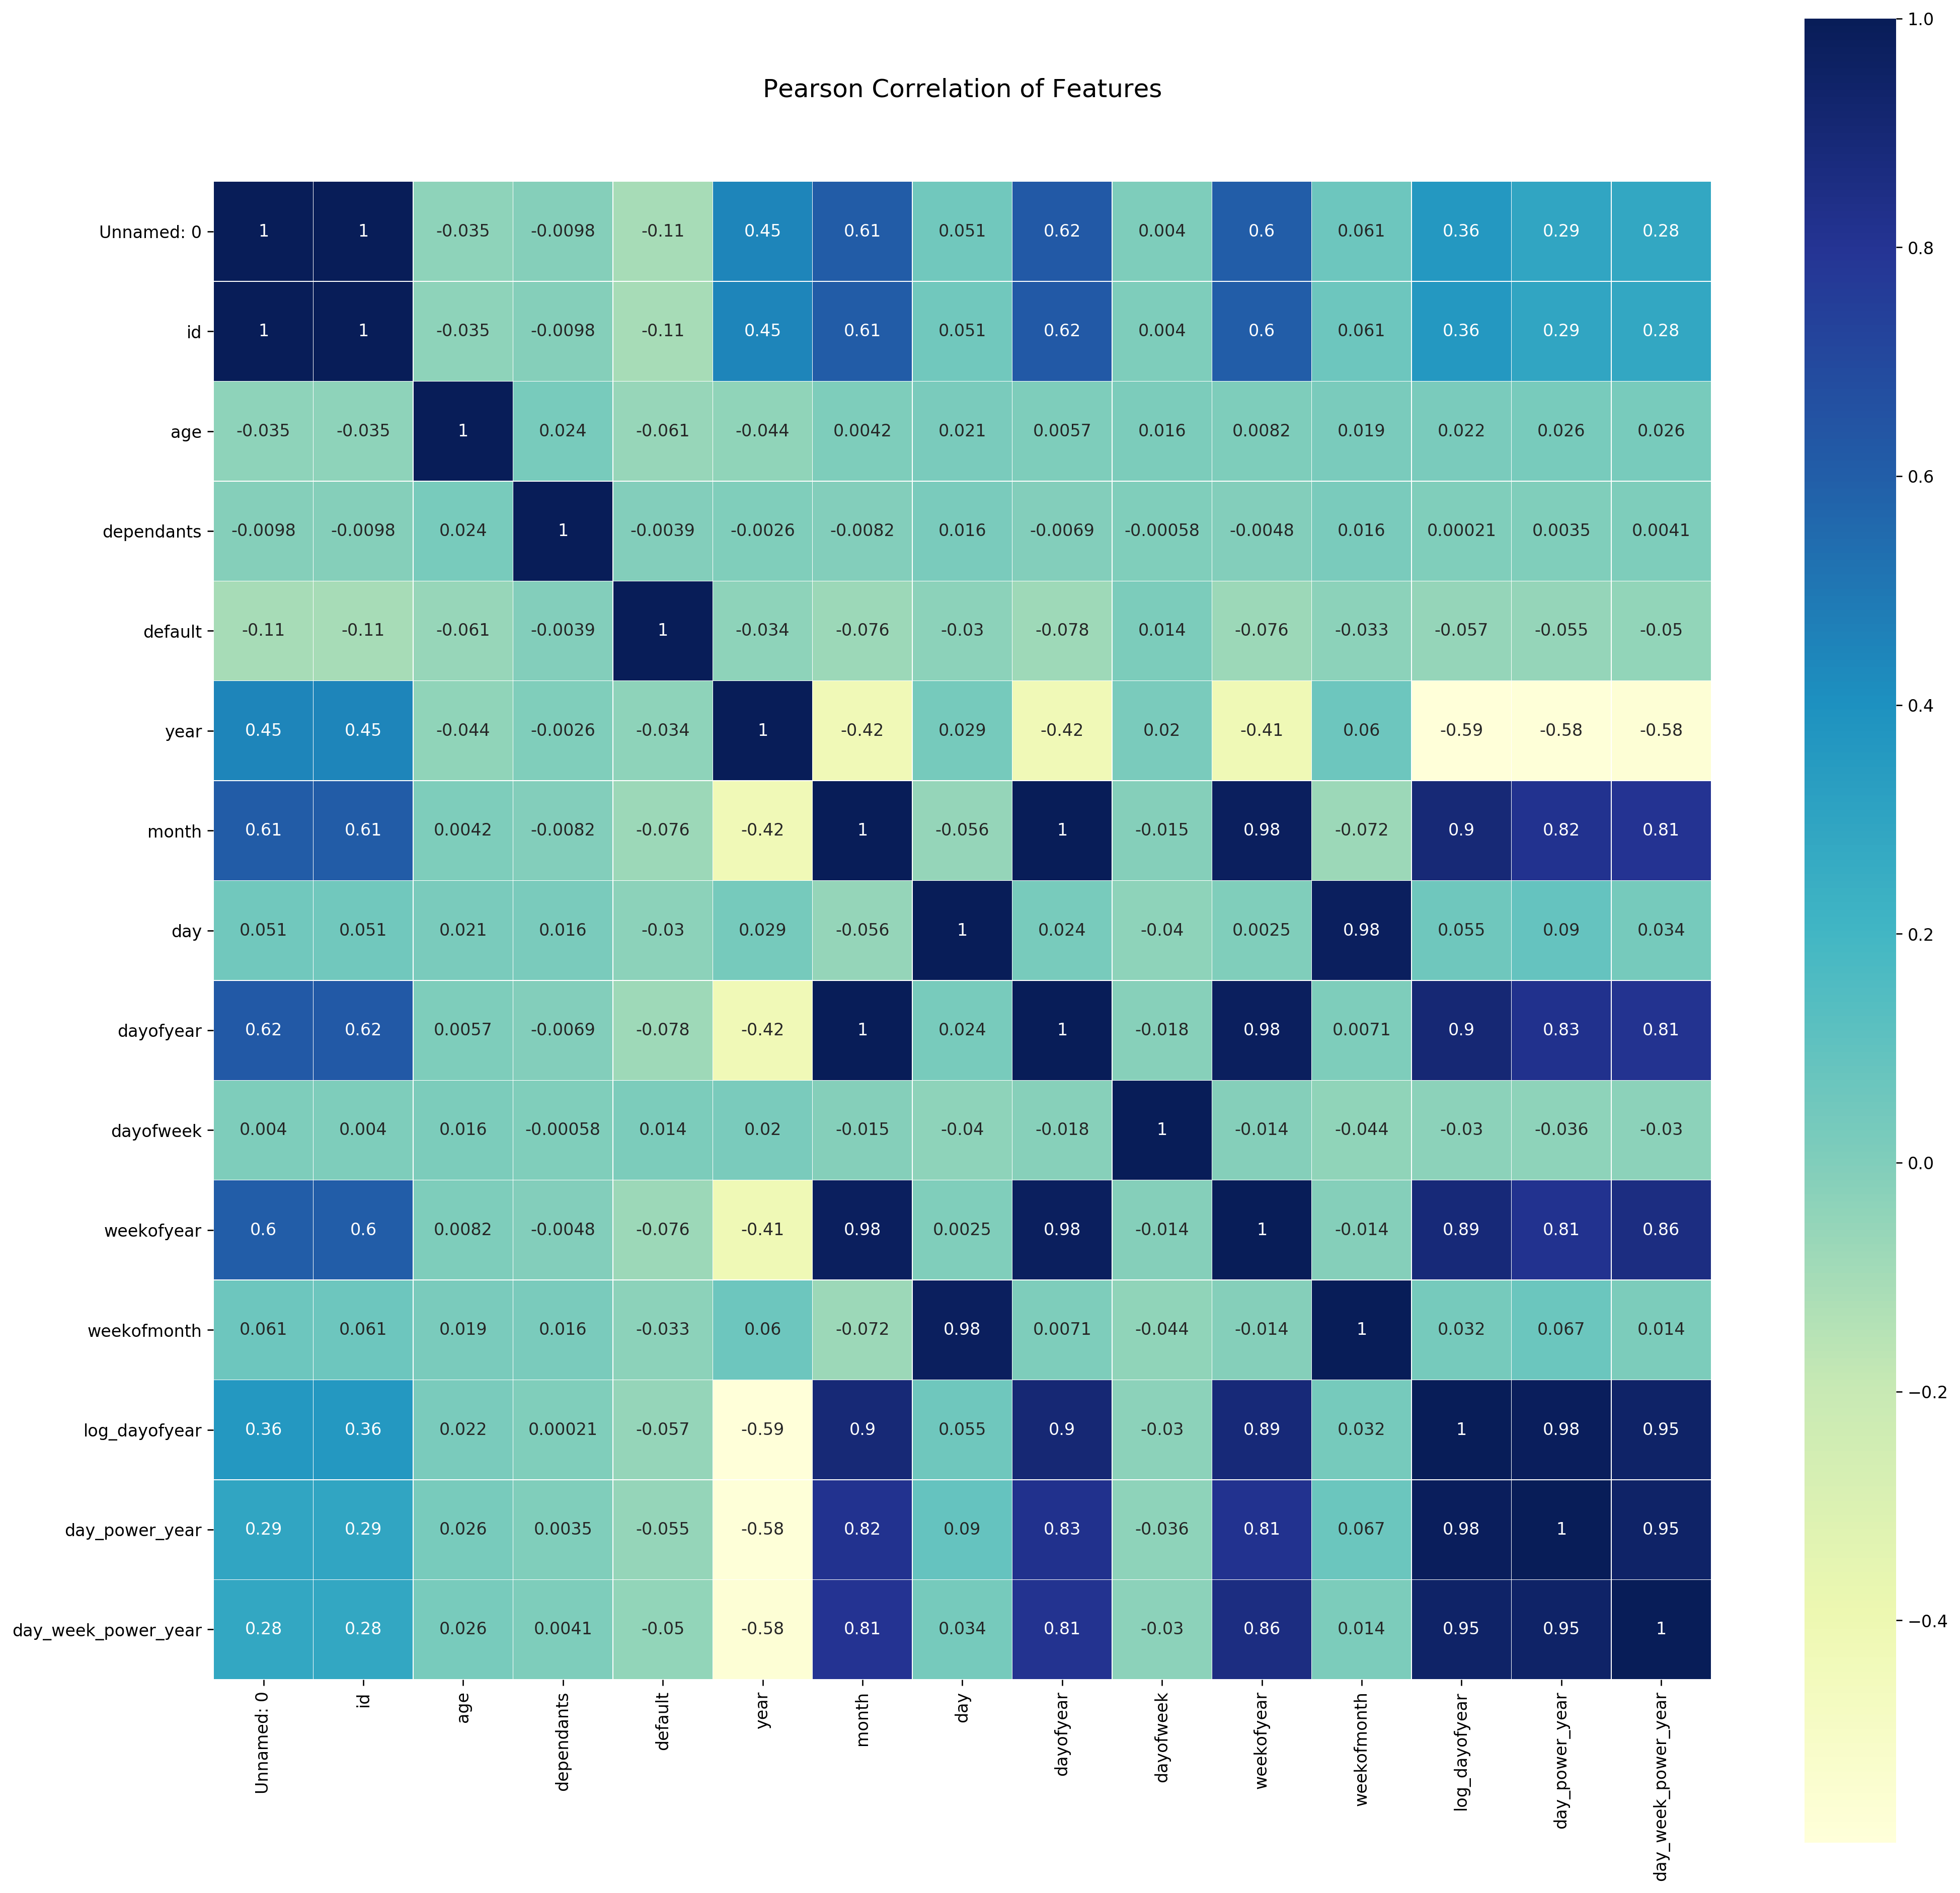

In [64]:
data_for_corelation =  dataset.select_dtypes(include=['int','float'])
colormap = plt.cm.RdBu
plt.figure(figsize=(20,20),dpi=240)
plt.title('Pearson Correlation of Features', y=1.05, size=15)

sns.heatmap(data_for_corelation.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap="YlGnBu",linecolor='white', annot=True)

In [65]:
data_for_corelation.drop(['day_power_year', 
                    'day_week_power_year',
                    'log_dayofyear',
                    'dayofyear',
                    'month', 
                    'day'
                         ],
                 axis=1, 
                 inplace=True)

/home/abdul/anaconda3/envs/BDA/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


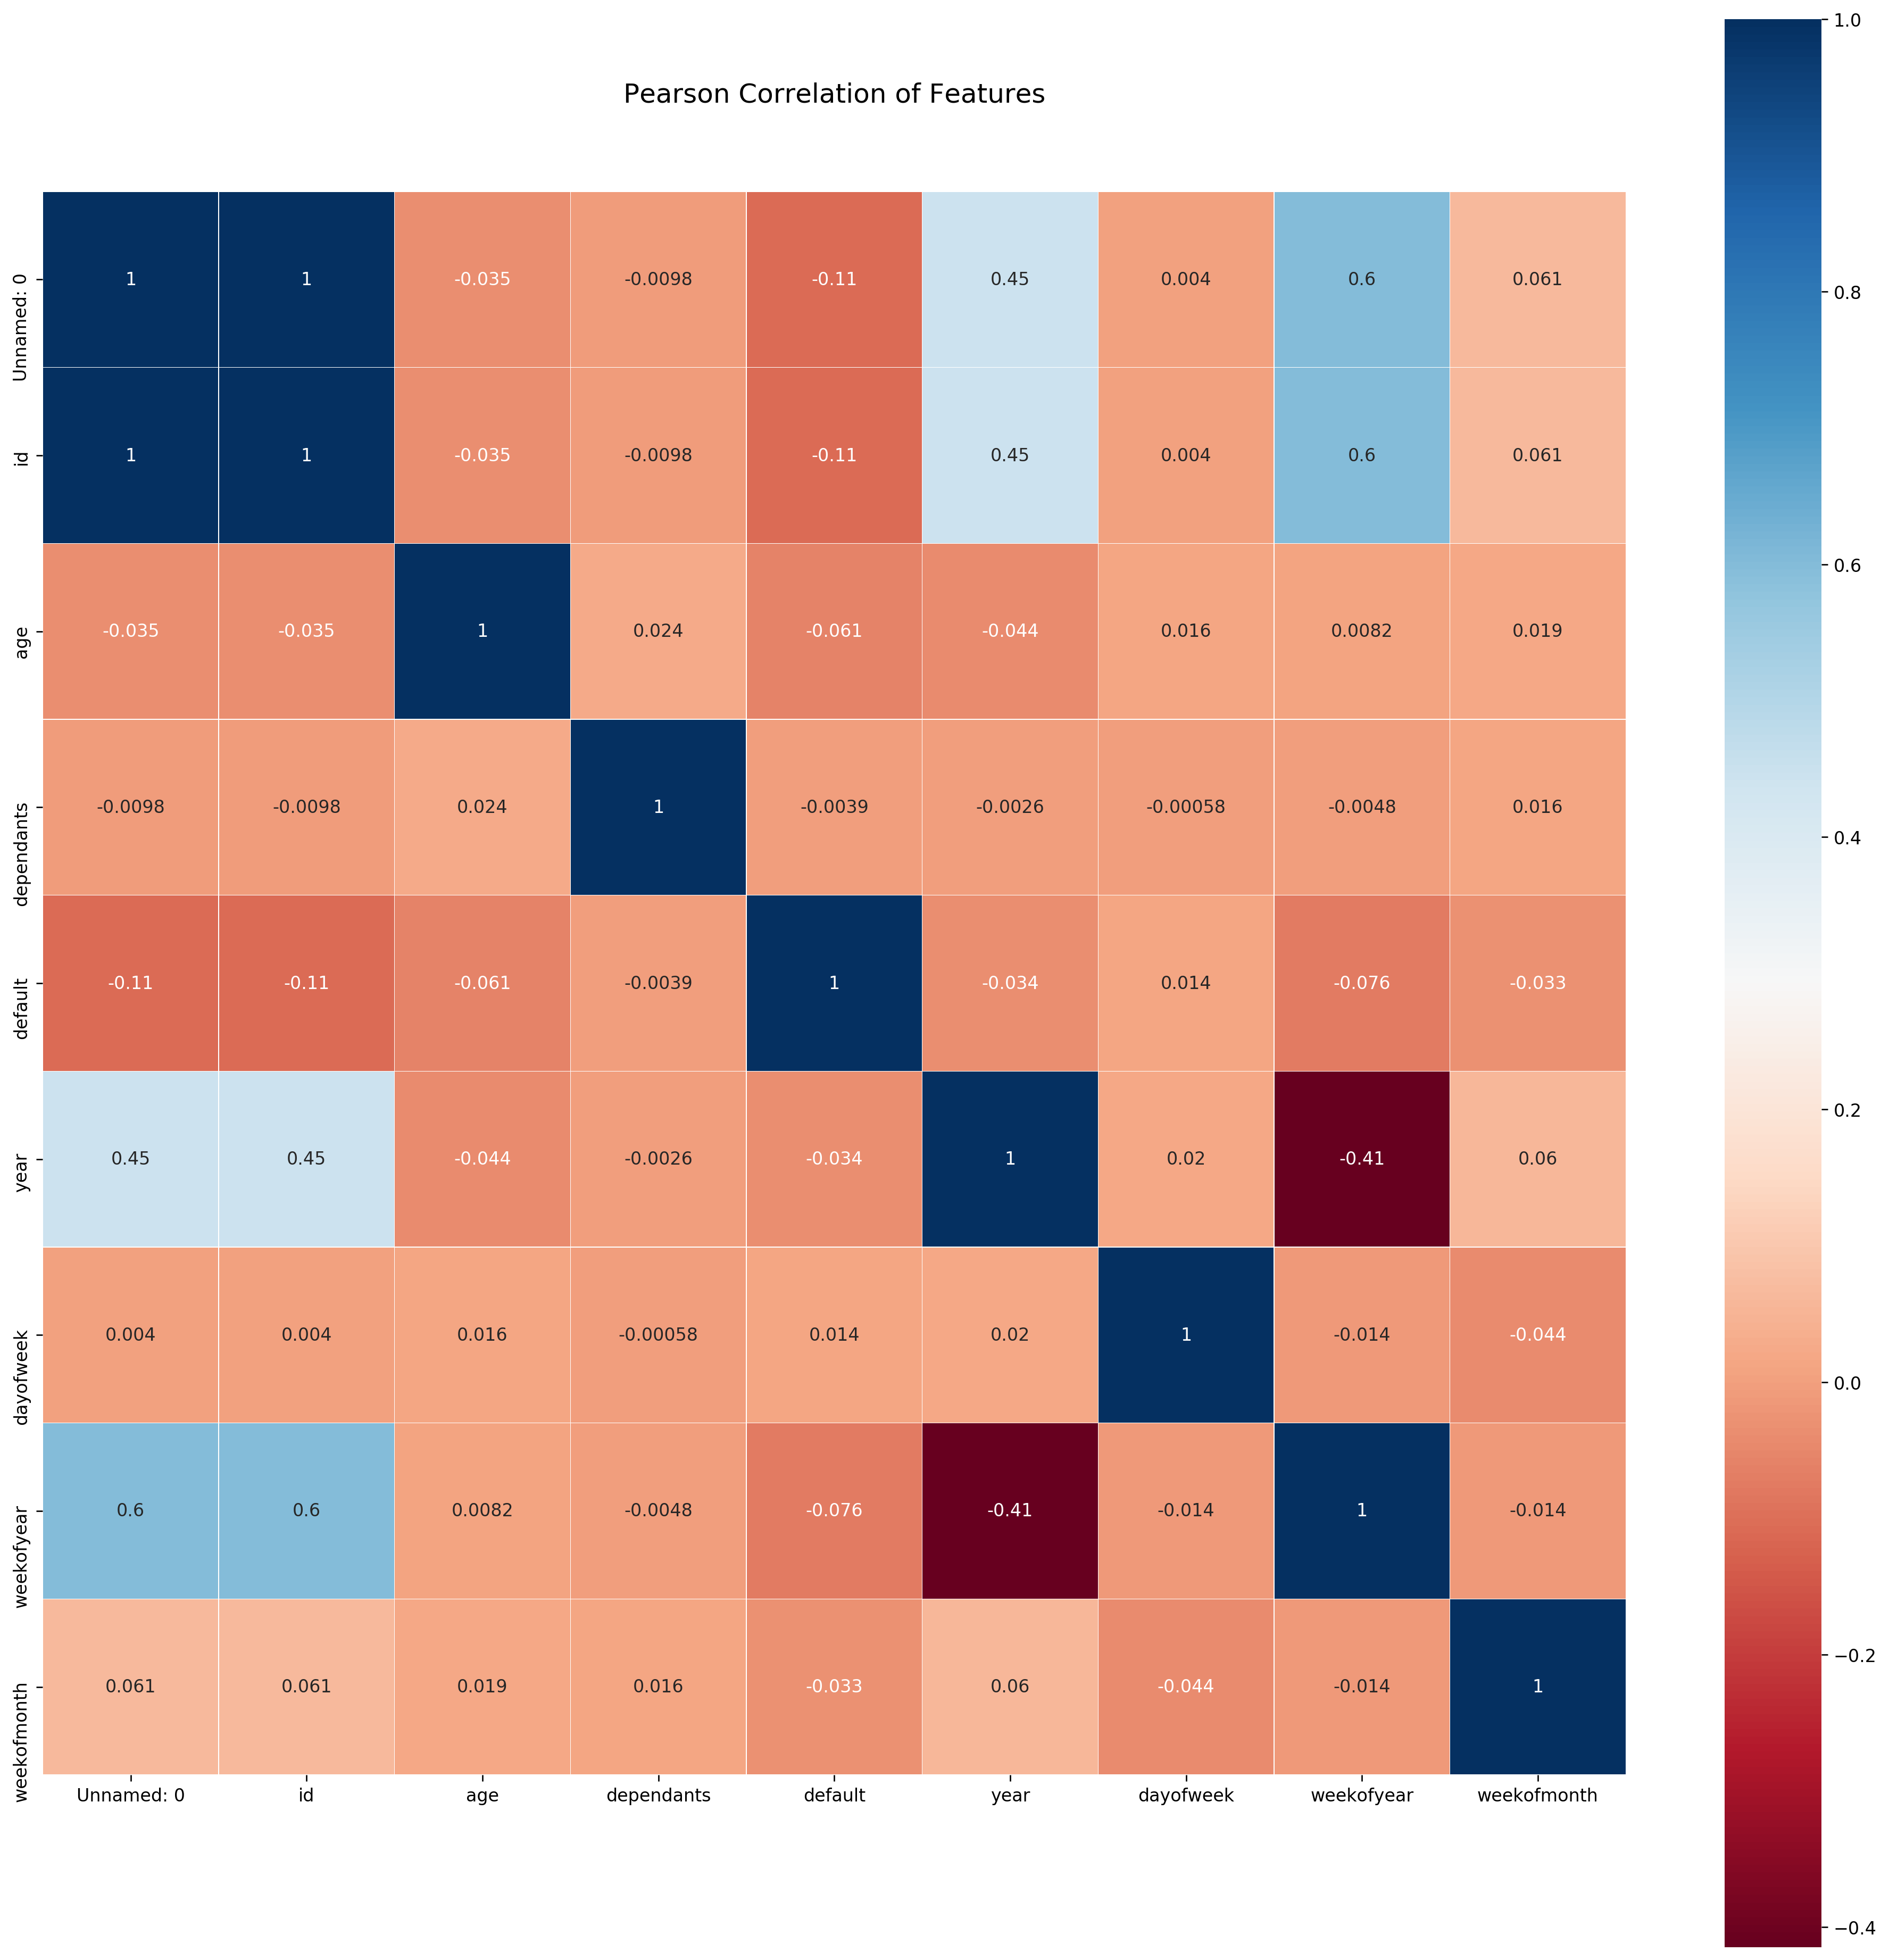

In [66]:
colormap = plt.cm.RdBu
plt.figure(figsize=(20,20),dpi=240)
plt.title('Pearson Correlation of Features', y=1.05, size=15)

sns.heatmap(data_for_corelation.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap="RdBu",linecolor='white', annot=True)

In [67]:
dataset_encoded.drop(['day_power_year', 
                    'day_week_power_year',
                    'log_dayofyear',
                    'dayofyear',
                    'month', 
                    'day',
                    'contract_start'
                             ],
                 axis=1, 
                 inplace=True)

In [68]:
display(dataset_encoded)

,Unnamed: 0,id,age,dependants,default,year,dayofweek,weekofyear,weekofmonth,gender_FEMALE,...,town_Hafnarfjörður,town_Kópavogur,town_Mosfellsbær,town_Reykjavík,town_Sauðárkrókur,town_Selfoss,town_Seltjarnarnes,town_Vestmannaeyjar,town_Álftanes,town_Ísafjörður
0,-1.732745,1,-0.082737,1.095381,0,-0.277669,0.841618,-1.641930,-1.432787,0,...,0,0,0,1,0,0,0,0,0,0
1,-1.732312,2,0.544890,1.095381,1,-0.277669,0.138289,-1.449770,0.861548,1,...,0,0,0,1,0,0,0,0,0,0
2,-1.731878,3,-1.337992,-0.843067,0,-0.277669,-0.565040,-1.641930,-1.432787,0,...,0,0,0,0,0,0,0,1,0,0
3,-1.731445,4,-1.337992,-0.843067,0,-0.277669,-0.565040,-1.641930,-1.432787,0,...,0,0,0,0,0,0,0,0,1,0
4,-1.731012,5,-1.427653,-0.196918,1,-0.277669,-0.565040,-1.641930,-1.432787,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7985,1.731215,7993,2.427772,-0.843067,0,3.600959,0.841618,-1.385717,1.626326,0,...,0,0,0,1,0,0,0,0,0,0
7986,1.731648,7994,1.531162,-0.843067,0,3.600959,0.841618,-1.385717,1.626326,1,...,1,0,0,0,0,0,0,0,0,0
7987,1.732081,7995,-0.172398,-0.843067,0,3.600959,0.841618,-1.321663,-0.668008,0,...,0,0,0,0,0,0,0,0,0,0
7988,1.732515,7996,-1.517314,0.449231,1,3.600959,-0.565040,-1.321663,-1.432787,1,...,0,0,0,1,0,0,0,0,0,0


In [69]:
dataset_encoded = dataset_encoded.loc[:, ~dataset_encoded.columns.str.contains('^Unnamed')]#dropping the unamed columns

In [70]:
X=dataset_encoded.drop('default',axis=1)
y=dataset_encoded.pop('default')

In [71]:
#x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=123,test_size=0.2)

In [72]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['default'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Numbe invalid type promotionr of7736 no subscription in oversampled data",len(os_data_y[os_data_y['default']==0]))
print("Number of subscription",len(os_data_y[os_data_y['default']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['default']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['default']==1])/len(os_data_X))

length of oversampled data is  10340
Numbe invalid type promotionr of7736 no subscription in oversampled data 5170
Number of subscription 5170
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [73]:
data_final = dataset_encoded
data_final_vars=data_final.columns.values.tolist()
y=['default']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/home/abdul/anaconda3/envs/BDA/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[False False False False False False False  True  True False False False
 False False False  True  True  True  True  True False False False False
 False False  True  True  True  True  True  True  True  True False  True
  True  True  True  True]
[21 17 20 16 19 15 18  1  1  8  4  7  3  5  6  1  1  1  1  1 10  9 11 14
 13 12  1  1  1  1  1  1  1  1  2  1  1  1  1  1]


In [74]:
dataset_encoded.iloc[:,rfe.support_]

,gender_FEMALE,gender_MALE,maritalstatus_COHABITING,maritalstatus_DIVORCED,maritalstatus_MARRIED,maritalstatus_SINGLE,maritalstatus_WIDOW,town_Akranes,town_Akureyri,town_Garðabær,town_Grindavík,town_Hafnarfjörður,town_Kópavogur,town_Mosfellsbær,town_Reykjavík,town_Selfoss,town_Seltjarnarnes,town_Vestmannaeyjar,town_Álftanes,town_Ísafjörður
0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7985,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7986,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7987,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7988,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [75]:
len(rfe.support_)

40

In [76]:
X_train=os_data_X[dataset_encoded.iloc[:,rfe.support_].columns.values.tolist()]
X_test = X_test[dataset_encoded.iloc[:,rfe.support_].columns.values.tolist()]
y_train=os_data_y['default']

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.92


In [79]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2213   11]
 [ 173    0]]


In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2224
           1       0.00      0.00      0.00       173

    accuracy                           0.92      2397
   macro avg       0.46      0.50      0.48      2397
weighted avg       0.86      0.92      0.89      2397



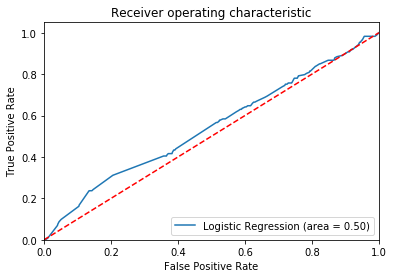

In [81]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()